<a href="https://colab.research.google.com/github/vishalbalaji-v/AI---1/blob/main/HW%20-%202%20/Vishal_Akshay_HW_2_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![](fig/univ.png)

# AI-1: ML/AI Basics
## Homework 2: Regression Modeling and Logistic Regression Classification

**AI1 Cohort 2**<br/>
**Univ.AI**<br/>
**Instructor**: Pavlos Protopapas, Ignacio Becker<br/>
**Maximum Score**: 100 + 5 (Extra Points)

<hr style="height:2.4pt">

**Name of the people who have worked on the homework:**


### Table of Contents
* [Instructions](#instructions)
* [Part A: Predicting percentage change in multiple bacteria populations given their spreading factor](#partA)
    * [Q1: Data Visualization](#partAQ1)
    * [Q2: Use k-fold cross validation along with Bootstraps to find the best degree](#partAQ2)
    * [Q3: Improving model consistency](#partAQ3)
* [Part B: Racial bias in machine learning systems](#partB)
    * [Q1: Setting up the problem and understanding the data](#partBQ1)
    * [Q2: Baseline model fitting](#partBQ2)
    * [Q3: 'Race'less model fitting](#partBQ3)
    * [Q4: Receiver Operating Characteristic curve](#partBQ4)    
* [Part C: Come up with a better model](#partC)

<hr style="height:2pt">

### Instructions <a class="anchor" id="instructions"></a>


- This homework is a jupyter notebook. Download and work on it in your local machine.

- This homework should be submitted in pairs.

- Ensure you and your partner together have submitted the homework only once. Multiple submissions of the same work will be penalised and will cost you 2 points.

- Please restart the kernel and run the entire notebook again before you submit.

- Running cells out of order is a common pitfall in Jupyter Notebooks. To make sure your code works restart the kernel and run the whole notebook again before you submit. 

- To submit the homework, either one of you upload the working notebook on edStem and click the submit button on the bottom right corner.

- Submit the homework well before the given deadline. Submissions after the deadline will not be graded.

- We have tried to include all the libraries you may need to do the assignment in the imports statement at the top of this notebook. We strongly suggest that you use those and not others as we may not be familiar with them.

- Comment your code well. This would help the graders in case there is any issue with the notebook while running. It is important to remember that the graders will not troubleshoot your code. 

- Please use .head() when viewing data. Do not submit a notebook that is **excessively long**. 

- In questions that require code to answer, such as "calculate the $R^2$", do not just output the value from a cell. Write a `print()` function that includes a reference to the calculated value, **not hardcoded**. For example: 
```
print(f'The R^2 is {R:.4f}')
```
- Your plots should include clear labels for the $x$ and $y$ axes as well as a descriptive title ("MSE plot" is not a descriptive title; "95 % confidence interval of coefficients of polynomial degree 5" is).

- **Ensure you make appropriate plots for all the questions it is applicable to, regardless of it being explicitly asked for.**

<hr style="height:2pt">

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#RUN THIS CELL 
import requests
from IPython.core.display import HTML

In [17]:
# Import libraries
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
sns.set()
import random

import warnings

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">
<h1>Part A: Predicting percentage change in multiple bacteria populations given their spreading factor</h1> <a class="anchor" id="partA"></a>

### [40 points]
**Overview and Data Description**
    
In this part of the homework, we will explore polynomial regression for 
predicting a quantitative variable. Specifically, we will build 
regression models that can predict the percentage change in 
bacteria population after 4 hours based on their spreading factor. 
These prediction models can be useful in clustering of a novel bacteria to any class. 

If the percentage of change in population increases this indicates 
that the size of the bacteria population is growing. 
One important factor to note is that the percentage change could be negative. 
This indicates that within the specified time frame, 
the population of the bacteria decreases from the original size.

The data set for this problem has already been split for you. You will find the train and test data sets in the files `data/bacteria_train.csv` and `data/bacteria_test.csv`, respectively. The first column in each file contains the spreading factor of bacteria populations and the second column gives information about the change in percentage of the population. 



**Problem Description**

Given the bacteria data, we will try to predict the percentage change 
in population giving the spreading factor. 
Based on the data visualisation we can see that there seems to be a 
non-linear relationship between the 2 variables. For this exercise we 
will consider the `Spreading_factor` to be our predictor variable 
and `Perc_population` to be our response variable. 
We will fit a polynomial regression model for a specified degree on the 
training set and evaluate it on the test set. 
The performance of the models should be evaluated using their $MSE$.

In [4]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 2/bacteria_train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/Colab files/AI - 1/HW - 2/bacteria_test.csv')

In [6]:
print(f'Train shape --> {df_train.shape}')
print(f'Test shape --> {df_test.shape}')
df_train.head()

Train shape --> (423, 2)
Test shape --> (108, 2)


,Perc_population,Spreading_factor
0,1.535,0.190708
1,5.555,0.326928
2,-0.277,-0.459699
3,1.724,-0.193013
4,-0.550,-0.835745


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 1:   Data Visualization [3 points]</b> <a class="anchor" id="partAQ1"></a>
    <br /><br />
**1.1** [2 pts] Generate a scatter plot of the data points in the `bacteria_train.csv` 
file with the `Spreading factor` on the $X$-axis and the `Percentage` 
change on the $Y$-axis. Make sure you clearly label the $x$ and $y$ axes and include proper title. 
<br /><br />
**1.2** [1 pts] Based on the graph, is there any discernable relationship between 
the spreading factor and percentage change in population?
    
</div>


### Solutions

<h4>1.1</h4> <b>Generate a scatter plot of the data points in the bacteria_train.csv file with the Spreading factor on the  𝑋 -axis and the Percentage change on the  𝑌 -axis. Make sure you clearly label the  𝑥  and  𝑦  axes and include proper title.<b>

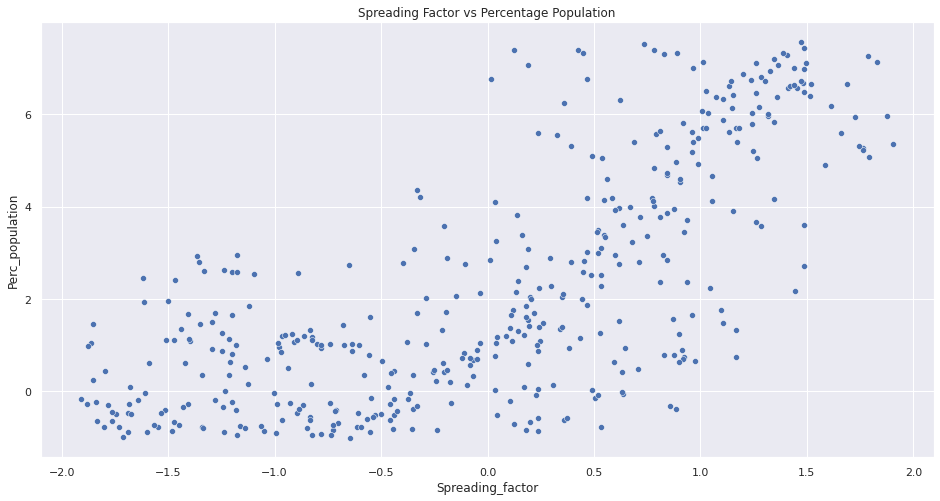

In [10]:
# your code here
plt.figure(figsize = (16,8))
sns.scatterplot(data = df_train, x = 'Spreading_factor', y = 'Perc_population')
plt.title('Spreading Factor vs Percentage Population')
plt.show()

<h4>1.2</h4> <b>Based on the graph, is there any discernable relationship between the spreading factor and percentage change in population?<b>

Ans. Yes, there seems to be a roughly exponential relationship between the 2 variables. But there is a lot of variability and any model we produce is bound to have a lot of error and variability


<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 2: Use k-fold cross validation along with bootstraps to find the best degree [11 points]</b><br />
<br /> <a class="anchor" id="partAQ2"></a>



**2.1** [8 pts] Use *bootstrapping* to test the robustness of your estimation of the degree chosen. As before, we use the `bacteria_train.csv` to train the model and `bacteria_test.csv` to test the model.
<br /><br />
**Instructions**<br />
- Select the max degree for computing the polynomial features and number of bootstraps.<br />
- Create bootstraps of the data. For each bootstrap perform the following:<br />
    - For each degree in the `range(1,max degree+1)` perform the following:<br />
        - Compute the polynomial features for the data.<br />
        - Perform k-fold cross validation with k=10<br />
        - Compute the polynomial features for the data.<br />
        - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
    - Select the degree for which the mean of the k-fold $MSE$ is the least.<br />
    - Store the best degree in a list<br />
- Plot a graph to show the frequency of the degree voted best for each bootstrap from the list from above steps.<br />
- The degree voted best the most times can be selected as the best degree.<br />
- Retrain on the entire train set and report the $MSE$ on the test set.<br />

<br />

**Hints**
- Limit the maximum degree to 50.
- Limit the number of bootstraps to 100.
- Use sklearn `cross_validate()` to perform cross validation.

<br /><br />
**Why this maybe a good idea?**
<br />
- Avoids the dependence on the particular choice of a validation set<br />
- Allows for more analysis without data augmentation<br /><br />

**Why this maybe a bad idea?**<br />

- Computationally more intensive<br />
- The stochasticity in the choice of bootstraps may give unexpected results<br /><br />

**2.2** [1 pt] What are your observations? <br />

- Why do you see so much variance in the `best_degree` over the bootstraps?<br />
- What will you choose as your `best_degree` for the test set? <br /><br />

**2.3** [2 pt] Fitting the best model on the test data<br /><br />

**Instructions**<br />
- For the best degree computed above, compute the polynomial features for the data in the test csv file.<br />
- Train on the entire data from the train csv file and predict on the test data.<br />
- Print the MSE of the model <br />
- Make a scatter plot of `Spread factor` vs. `Precentage change in population` for the specified degree.  The figure should have plot of the test prediction from the regression and the actual values on the same figure. <br />
- Print the coefficients of the model<br /><br />

**Hint**<br />
* Sort the $x$ values before making your plots.
    
    
</div>

### Solutions

<h4>2.1</h4> <b>Use bootstrapping to test the robustness of your estimation of the degree chosen.<b>

In [33]:
# your code here
len_train = len(df_train)
bootstraps = []

for i in range(100):
  bootstraps.append(sorted(random.choices(np.arange(len_train),k = len_train)))

In [49]:
maxdeg = 50
MSE_list = []

for i in bootstraps:
  df_new = df_train.loc[i]
  mse_inner = []
  for j in range(1,maxdeg + 1):
    x = df_new[['Spreading_factor']]
    y = df_new['Perc_population']

    x_poly = PolynomialFeatures(j).fit_transform(x)

    lreg = LinearRegression()

    mse_score = cross_validate(lreg,x_poly,y,scoring = 'neg_mean_squared_error',cv = 10, return_train_score = True)

    mse_inner.append(np.mean(np.abs(mse_score['test_score'])))

  MSE_list.append(mse_inner)


In [69]:
# your code here
MSE_means = np.mean(np.array(MSE_list), axis = 0).reshape(-1,)

MSE_min = min(MSE_means)
min_degree = np.argmin(MSE_means) + 1

print(f'The polynomial degree that gives the minimum MSE is {min_degree} with MSE of {MSE_min:.4f}')

The polynomial degree that gives the minimum MSE is 4 with MSE of 2.6539


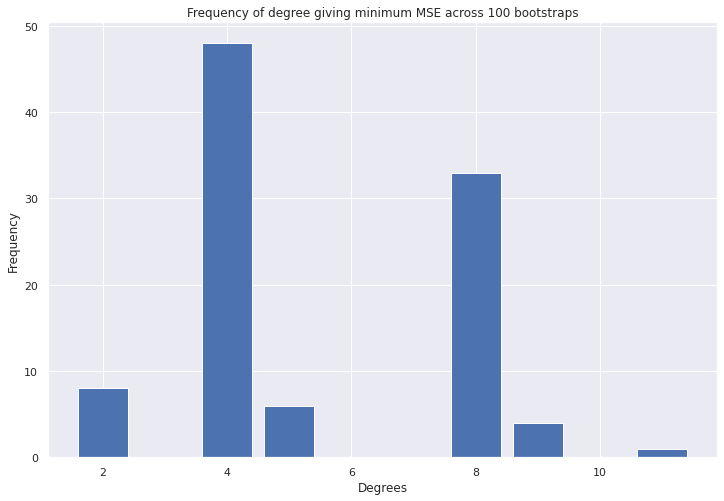

In [78]:
# your code here
degrees = {i:0 for i in range(1,51)}
for i in MSE_list:
  degrees[np.argmin(i) + 1] += 1

degrees = {k:v for k,v in degrees.items() if v != 0}

plt.figure(figsize = (12,8))
plt.bar(degrees.keys(),degrees.values())
plt.title('Frequency of degree giving minimum MSE across 100 bootstraps')
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.show()

Retraining model with best degree

In [79]:
x_train = df_train[['Spreading_factor']]
y_train = df_train['Perc_population']

x_test = df_test[['Spreading_factor']]
y_test = df_test['Perc_population']

x_poly_train = PolynomialFeatures(min_degree).fit_transform(x_train)
x_poly_test = PolynomialFeatures(min_degree).fit_transform(x_test)

lreg = LinearRegression()
lreg.fit(x_poly_train,y_train)

y_pred_train = lreg.predict(x_poly_train)
y_pred_test = lreg.predict(x_poly_test)

MSE_test = mean_squared_error(y_pred_test,y_test)

print(f'The mean squared error on the test set is {MSE_test:.4f}')

The mean squared error on the test set is 2.5999


<h4>2.2</h4> <b>What are your observations?<b>

<b> a) Why do you see so much variance in the best_degree over the bootstraps?<b>

In [96]:
uniques_list = []
for i in bootstraps:
  uniques_list.append(len(np.unique(np.array(i))))

print(f'The average number of rows selected in each bootstrap is {np.mean(uniques_list)}')

The average number of rows selected in each bootstrap is 268.23


Ans. Out of the total 423 rows, on average only 268 rows are selected in the bootstrap. This is why there is a lot of variance in the best degree of the bootstrap

<b> b) What will you choose as your best_degree for the test set?<b>

Ans. The best degree should be 4. The degree 4 both lowest average MSE and also the least MSE in most number of bootstraps 

<h4> 2.3 </h4> <b> Fitting the best model on the test data <b>

In [128]:
# your code here
x_1 = x_test['Spreading_factor'].to_numpy()
idx = np.argsort(x_1)
x_dummy = x_1[idx]
y_dummy = y_pred_test[idx]

The coefficient of degree 0 of the polynomial is 0.0000
The coefficient of degree 1 of the polynomial is 2.1714
The coefficient of degree 2 of the polynomial is 1.5898
The coefficient of degree 3 of the polynomial is -0.1447
The coefficient of degree 4 of the polynomial is -0.3141




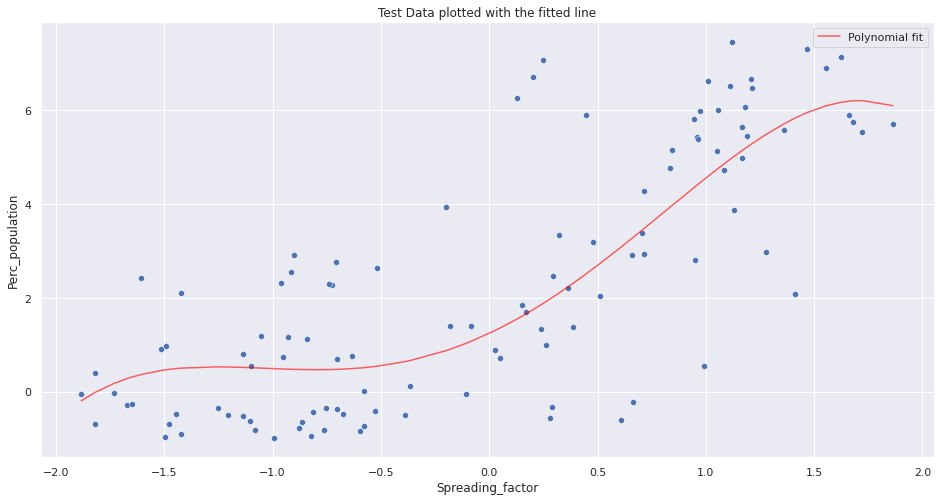

In [134]:
# your code here
coefs = lreg.coef_
for i in range(len(coefs)):
  print(f'The coefficient of degree {i} of the polynomial is {coefs[i]:.4f}')

print('\n')

plt.figure(figsize = (16,8))
sns.scatterplot(data = df_test, x = 'Spreading_factor', y = 'Perc_population')
plt.plot(x_dummy,y_dummy,label = 'Polynomial fit', color = 'red', alpha = 0.6)
plt.title('Test Data plotted with the fitted line')
plt.legend()
plt.show()

<div class="alert alert-block alert-danger" style="color:black;background-color:#E7F4FA">

<b> Question 3:   Improving model consistency [26 points]</b> <a class="anchor" id="partAQ3"></a>
<br /><br />
In the previous section, we compared **30** polynomial models to find the best degree. For each model of degree n, we considered all polynomial coefficients *up to* **degree `n`** using `Polynomial_features`. However, our **best model** could have been from any possible combination of the **30** degrees chosen.
<br />
For eg. a model with degrees `1,2,4,6`
<br />
The total number of such possible models is $2^{30}\approx10^9$ and searching through all of them would be laborious and computationally inefficient. Instead, we can use $Lasso$ Regularisation which *switches off* highly unstable degree coefficients and gives us the most efficient solution.
<br /><br />

**3.1** [10 pts] Find the best hyper-parameter `alpha`.<br />

First, we will use `cross_validate` to find the the best regularisation parameter `alpha`. As before, we use the `bacteria_train.csv` for cross validation.
<br /><br />
**Note**: You are free to experiment with the values of alpha. Our suggestion is to use in powers of 10 from $10^{-3}$ to $10^{3}$
<br /><br />
**Instructions**<br />
- Select the max degree of the polynomial, and make a list of `alpha` values.<br />
- For each value of `alpha`:<br />
    - Compute the polynomial features for the data.<br />
    - Create a `Lasso` regularisation model with the value of `alpha`<br />
    - Perform k-fold cross validation with k=10 using `Lasso` as model.<br />
    - Compute the $MSE$ of the train and validation data and store in separate lists. <br />
- Select the `alpha` for which the mean of the k-fold $MSE$ is the least.<br />
- Store the previously selected values as `best alpha` & print it.<br />

<br /><br />

**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**3.2** [10 pts] Find the most significant degrees.<br />

From the previous section, you will now have the `best_alpha` hyperparameter. Now, we will use this to find the most significant degrees over a given number of bootstraps. What we mean by the above is this:<br />

For each bootstrap of the data, you will get some degrees that are **significant** $\mid\beta_i\mid \lt 0.1$. You would like to see, which degree coefficients are significant over several such iterations.<br />

As before, we use the `bacteria_train.csv` for cross validation.<br /><br />

**Note:** You are free to experiment with the number of bootstraps.<br /><br />


**Instructions**<br />
- Make a dictionary called `significant_degrees` to store count of degrees for each bootstrap.<br />
- For each bootstrap:<br />
    - Take a sample the dataframe with `frac=1`.<br />
    - Train a **Lasso** model with the `best_alpha` computed above.<br />
    - Find the most significant polynomial coefficients using $\mid\beta_i\mid \lt 0.1$.<br />
    - For each significant degree, update the count of that degree in `significant_degrees` .<br />
- Plot the count of degrees for each bootstrap as a bar plot.<br /><br />


**Hints**<br />
- Limit the maximum degree to 30.<br />
- Take at least three different values of alpha.<br />
- Use sklearn `cross_validate()` to perform cross validation.<br /><br />

**3.3** [2 pts] Compute the MSE on the test set<br />

Now, from the previous plot, you can see that only degrees upto 6 are consistently significant over several bootstraps. You will now retrain the *L1* regularised model on the entire data and find the test $MSE$<br /><br />

**Instructions**<br />

- Retrain the *regularised* model with *most frequent degree (most significant highest degree)* on the entire test set and report the $MSE$ on the test set.<br />
- Find the degrees of the polynomial that have cofficients with absolute value greater than 0.1<br />
- Compare the test $MSE$ computed in section 3, to the previous section and report your observations.<br />
- Plot a graph indicating your true and predicted data.<br />

**3.4** [4 pts] What are your Observations?<br />

- Is the `best_degree` computed above more consistent over the bootstraps? Why?<br />
- Which degree coefficients in your best fit model from above are significant? Why only some?<br />
- Is your test $MSE$ with regularisation comparable to the findings from previous section. If more, or less, by how much?<br />
- Is your current model more reliable? On what basis do you claim its robustness?<br />
    
    
</div>

### Solutions

<h4>3.1</h4>
<b>Find the best hyper-parameter alpha.<b>

In [ ]:
# your code here


In [ ]:
# your code here


<h4> 3.2 </h4> <b> Find the most significant degrees. <b>

In [ ]:
# your code here


In [ ]:
# your code here


<h4> 3.3  </h4> <b> Compute the MSE on the test set <b>

In [ ]:
# your code here


In [ ]:
# your code here


<h4> 3.4 </h4> <b> What are your observations? <b>

<b> a) Is the best_degree computed above more consistent over the bootstraps? Why? <b>

Ans.

<b> b) Which degree coefficients in your best fit model from above are significant? Why only some? <b>

Ans.

<b> c) Is your test  𝑀𝑆𝐸  with regularisation comparable to the findings from previous section. If more, or less, by how much? <b>

Ans.

<b> d) Is your current model more reliable? On what basis do you claim its robustness? <b>

Ans. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part B: Racial bias in machine learning systems</h2> <a class="anchor" id="partB"></a>

### [60 points] 
    
![](https://static.propublica.org/projects/algorithmic-bias/assets/img/generated/opener-b-crop-2400*1350-00796e.jpg)

<br />
<b> Dataset Description </b><br />
    
The main dataset is the `compas.csv` <br />
ProPublica's analysis is publically available [here](https://github.com/propublica/compas-analysis).

The dataset was made publically available by **Northpointe**, an American tech-company that works with law establishment across several states in the US to predict future crimes based on past records of criminals.

It has been suspected that the software used by Northpointe, `COMPAS`, is biased against the african american criminals, who end up with `high-risk` tags, despite minor criminal record, whereas `Caucasians` regularly received low-scores despite more significant criminal charges.
    
After pressure from several news agencies and a public investigation by ProPublica, the company released this dataset with a slice of the factors usually considered in order to assign a score to criminals.
<br /><br />
The dataset also contains a column `two_year_recid` with a binary response, i.e `1` if the released criminal ended up committing another crime within two years and `0` if the criminal did not commit a crime within a period of two years.
    
To learn more about this dataset, and the public investigation, you are highly recommended to read ProPublica's article on [Machine Bias](https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing)

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 1: Setting up the problem and understanding the data [15 points]** <a class="anchor" id="partBQ1"></a>

**1.1** [1pt] Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).<br />

**Note:** Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later. 
<br /><br />
**1.2** [4pts] Can you guess why processing the categorical predictors is important? What is the risk of processing categorical predictors after splitting into train and validation sets?
<br /><br />

**1.3** [8pts] Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay
<br /><br />

**1.4** [2pts] Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.
<br /><br />

<h4>1.1</h4>
<b>
Split the data into 80% training and 20% validation sets stratified by race.

By Stratified we mean that the two sets should have roughly similar distribution of races as the original data. For more information on how to stratify using sklearn, check sklearn documentation here.
<br />
</b>    
**Note:** Before splitting you may want to process the categorical predictors first so you don't have to do it separately in train and validation later.

In [ ]:
# your code here


In [ ]:
# your code here


<h4>1.2</h4>
<b>Can you guess why processing the categorical predictors is important? What is the risk of processing categorical predictors after splitting into train and validation sets?

Ans.

<h4>1.3 </h4>
<b>
Make overlapping distributions (histograms) of the following predictors for two groups, African American & Caucasian.
- Age
- Priors count
- Sex
- Length of stay


In [ ]:
# your code here


<h4>1.4</h4>
<b> 
Among the following variables, which ones show disparity between the two groups? Explain your results in 2-3 sentences.

Ans. 

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
   
**Question 2: Baseline model fitting [19 points]** <a class="anchor" id="partBQ2"></a>

**2.1** [15pts] Build a logistic regression model to predict recidivism (`two_year_recid`) on these data and be sure to include race as a predictor.<br />
**Note**: In your list of predictors, `race` is one of the predictors.

Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. *False Positive Rate(FPR)* as a percentage for:
    - `African Americans`
    - `Cacausians`
3. *False Negative Rate(FNR)* as a percentage for:
    - `African Americans`
    - `Caucasians`
4. Ratio of the FPR between `African_Americans` and `Caucasians`
5. Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$

<br  /><br />
**2.2** [4pts] What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.


<h4>2.1</h4>
<b> 
Build a logistic regression model to predict recidivism (two_year_recid) on these data and be sure to include race as a predictor.

In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


<h4>2.2</h4>
<b>
What do you observe? Is there any disparity in the $FPR$ and $FNR$ for the two groups?
Explain your findings in 3-6 sentences.

Ans.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 3: 'Race'less model fitting [16 points]** <a class="anchor" id="partBQ3"></a>
 
**3.1** [10pts] Refit the logistic model in 2.1 but this time **without** `race` as a predictor. 
Again, Report the following on the **validation set**:
1. Overall model accuracy as a percentage
2. **False Positive Rate(FPR)** as a percentage for:
    - African Americans
    - Caucasians
2. **False Negative Rate(FNR)** as a percentage for:
    - African Americans
    - Caucasians
3. 
    - Ratio of the FPR between `African_Americans` and `Caucasians`
    - Ratio of the FNR between `African_Americans` and `Caucasians`

i.e $\frac{FPR(AA)}{FPR(CC)}$ and $\frac{FNR(AA)}{FNR(CC)}$


<br /><br />

**3.2** [2pts] Now, without the `race` as a predictor, what do you observe? 
<br /><br />
**3.3** [2pts] How do these compare to the model when the race **is** included as a predictor?
<br /><br />
**3.4** [2pts] Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


<h4>3.1</h4>
<b>
Refit the logistic model in 2.1 but this time without race as a predictor. 

In [ ]:
# your code here


In [ ]:
# your code here


<h4> 3.2 </h4>
<b>
Now, without the race as a predictor, what do you observe?

Ans.

<h4>3.3</h4>
<b>How do these compare to the model when the race is included as a predictor?

Ans.

<h4>3.4</h4>
<b>Given your exploration and modeling of the data, should a predictive tool be trusted to be unbiased even if it doesn’t explicitly use a variable such as race to predict future crime?  Why or why not?  Why is the bias still occurring or not occurring?  Explain in 3-6 sentences total.


Ans.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
    
**Question 4: Receiver Operating Characteristic curve [10 points]** <a class="anchor" id="partBQ4"></a>

**4.1** [5pts] Use logistic regression from above and plot the *Receiver Operating Characteristic curve* for two races, `African Americans` & `Caucasians`. 
<br /><br />
**4.2** [5pts] You will notice that changing the thresholds can *reduce* bias between the two classes, but it can also affect model accuracy. We want our model to be **accurate** but also **unbiased**. So what shall we do?

- Remove bias?
- Lose model accuracy?

Write down your strategy to overcome this difficulty. Please keep your answers short (300 word limit)


<h4>4.1</h4>
<b>
Use logistic regression from above and plot the Receiver Operating Characteristic curve for two races, African Americans & Caucasians.

In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


In [ ]:
# your code here


<h4>4.2</h4>
<b>
How to ensure the model is accurate and unbiased? Please keep your answers short (300 word limit)

Ans.

<div class="alert alert-block alert-danger" style="color:black;background-color:#EFF8D0">
<h2 style="color:black;background-color:#EFF8D0"> Part C: Come up with a better model [Optional Extra 5 Points*] </h2>  <a class="anchor" id="PartC"></a>
    
Improve the models you have previously coded by including:
 - Polynomial terms
 - Interaction terms
 - Regularization parameters
 - Different upsampling techniques
 - KNN classification

with a goal to maximize the new metric which includes both the bias and the accuracy, we define `Bias_Corrected_Accuracy(BCA)` as:
    

$$BCA = Acccuracy - {\left|FPR(AA) - FPR(CC)\right|}$$
    
 
Please report your maximum `BCA` on the forums and add the computation code to your homework for bonus points.

**Note:** The ideas given above are not exhaustive. You are free to try other betters to come up with a better model.

*This is an optional section for 5 points. If you lose 5 points in Part A and Part B, you can make it up in this section. The maximum score still remains 100.

In [ ]:
# your code here


In [ ]:
# your code here
